<a href="https://colab.research.google.com/github/petsme/trabalho_bd1/blob/master/Pets%26Me_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estabelecendo conexão com o banco.

In [0]:
import psycopg2 as psy
import pandas as panda


connect = psy.connect(host = "tuffi.db.elephantsql.com", port = "5432", database = "byvvxfmo", user = "byvvxfmo", password = "wfRAxJuvndPFf5JxD3Ni4Y4N5FZfT8PS")

cursor = connect.cursor()

cursor.execute('start transaction')

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


1 - Consultas Com Inserts

In [0]:
import seaborn as sns
import pandas as pd
import psycopg2


insert_usuario = panda.read_sql_query("SELECT * FROM Usuario", connect)

insert_protector = panda.read_sql_query("SELECT * FROM Protector", connect)

insert_adopter = panda.read_sql_query("SELECT * FROM Adopter", connect)

insert_adota = panda.read_sql_query("SELECT * FROM Adota", connect)

insert_visita = panda.read_sql_query("SELECT * FROM Agenda_Visita", connect)

insert_contatos = panda.read_sql_query("SELECT * FROM Dados_Contato", connect)

insert_classifica = panda.read_sql_query("SELECT * FROM Classifica", connect)

insert_documentacao = panda.read_sql_query("SELECT * FROM Documentacao", connect)

In [0]:
#-----INSERIR-NOME-DA-VARIAVEL-PARA-PRINTAR-----#

insert_usuario

,id,nome_sobrenome,sexo,data_nascimento,rg,cpf,senha,nome_usuario
0,12346,Claudio Moreira,M,1972-04-25,65896,123478998,Macarao,c.moreira
1,12347,Renato Goncalvez,M,1966-01-01,36523,123468596,Molho,r.gon
2,12348,Mariana Rodrigues,F,1988-07-13,25412,123498765,Topster,mar_ia
3,12349,Marcelo Augusto,M,1992-02-14,58745,235655687,ToNemAi,marcel_aug
4,12340,Paloma Silva,F,1976-07-25,25632,321654265,Teste,p.silva
5,12341,Santiago Santos,M,2000-03-07,65412,965274145,Chocolate123,sa.sou
6,12342,Sandro Souza,M,1974-02-28,23654,369814745,Marvilha321,sandrosouzinha22
7,12343,Abigail de Oliveira,F,1960-03-19,58974,258914765,NemSeiASenha,ab.gail
8,12344,Maria da Penha,F,2000-08-30,56789,852364165,Eureca,maria.penha
9,16458,Roger Machado,M,1985-04-12,64585,965274147,Novinha22,roger.machado


2 - Consulta Com Filtro Where

In [0]:
import seaborn as sns
import pandas as pd
import psycopg2

where_animal_sexo_m = pd.read_sql_query("""SELECT Nome_Animal AS "Nome Animal", 
  Sexo_Animal AS "Sexo" From Animal
WHERE Sexo_Animal = 'M'""",connect)

where_animal_sexo_f = pd.read_sql_query("""SELECT Nome_Animal AS "Nome Animal", 
  Sexo_Animal AS "Sexo" From Animal
WHERE Sexo_Animal = 'F'""",connect)

where_usuario_nota = panda.read_sql_query("""SELECT id_usuario_2 AS "ID_Usuario", Nota FROM Classifica WHERE Nota = 5 OR Nota = 4""", connect)

where_usuario_sexo_f = panda.read_sql_query("""SELECT Nome_Sobrenome FROM Usuario WHERE Sexo = 'F'""", connect)

In [0]:
#-----INSERIR-NOME-DA-VARIAVEL-PARA-PRINTAR-----#

where_animal_sexo_m

,Nome Animal,Sexo
0,Billy,M
1,Rex,M
2,Spike,M
3,Pretinho,M
4,Bob,M
5,Brutus,M
6,Luke,M
7,Nick,M
8,Apolo,M
9,Zeus,M


3 - Consulta Com Operador Lógico ou Campos Renomeados


In [0]:
import seaborn as sns
import pandas as pd
import psycopg2

logico_usuario_nota = pd.read_sql_query("""SELECT u.Nome_Sobrenome AS "Nome", 
  c.Nota as "Nota" FROM Usuario as u
  INNER JOIN Classifica as c ON (u.ID = c.ID_usuario_2)
  WHERE c.Nota = 5 OR c.Nota = 4 ORDER BY Nota""",connect)

logico_id = panda.read_sql_query("SELECT * FROM Usuario WHERE ID > 5 OR ID < 100", connect)

logico_sexo_nome_m = panda.read_sql_query("""SELECT Nome_Sobrenome, Sexo FROM Usuario WHERE Sexo = 'M' AND Nome_Sobrenome ILIKE 'M%'""", connect)

logico_sexo_nome_f = panda.read_sql_query("""SELECT Nome_Sobrenome, Sexo FROM Usuario WHERE Sexo = 'F' OR Nome_Sobrenome LIKE 'A%'""", connect)

logico_sexo_ano = panda.read_sql_query("""SELECT Nome_Sobrenome, Sexo FROM Usuario WHERE Sexo = 'M' AND EXTRACT(Year FROM(Data_Nascimento)) > 1999""", connect)

logico_sexoanimal_year = panda.read_sql_query("""SELECT Nome_Animal, Sexo_Animal FROM Animal WHERE EXTRACT(Year FROM(Data_Cadastro)) <= 2017 AND Sexo_Animal = 'F'""", connect)

logico_sexoanimal_nome_f = panda.read_sql_query("""SELECT Nome_Animal, Sexo_Animal FROM Animal WHERE Nome_Animal ILIKE 'A%' AND Sexo_Animal = 'F'""", connect)

logico_sexoanimal_nome_m = panda.read_sql_query("""SELECT Nome_Animal, Sexo_Animal FROM Animal WHERE Nome_Animal ILIKE 'B%' AND Sexo_Animal = 'M'""", connect)

rename_nome_usuario = panda.read_sql_query("""SELECT Nome_Sobrenome AS "Nome do Usuario" FROM Usuario""", connect)

rename_nome_animal = panda.read_sql_query("""SELECT Nome_Animal AS "Nome do Animal" FROM Animal""", connect)

rename_data_nascimento = panda.read_sql_query("""SELECT Data_Nascimento AS "Data de Nascimento", Nome_Sobrenome AS "Nome do Usuario" FROM Usuario""", connect)

In [0]:
#-----INSERIR-NOME-DA-VARIAVEL-PARA-PRINTAR-----#

logico_usuario_nota

,Nome,Nota
0,Cecilia Maria,4
1,Paloma Silva,5
2,Sandro Souza,5
3,Maria da Penha,5
4,Marcos Rocha,5


4 - Like e Datas

In [0]:
import seaborn as sns
import pandas as pd
import psycopg2

likedata_idade_nome_t = pd.read_sql_query("""SELECT Nome_Sobrenome, EXTRACT (Year FROM AGE (current_date, Data_Nascimento)) AS "Idade" 
FROM Usuario WHERE Nome_Sobrenome ILIKE '%t%'""",connect)

likedata_nome_a = pd.read_sql_query("""SELECT * FROM Usuario WHERE Nome_Sobrenome LIKE 'A%'""",connect)

likedata_anonas_idade = pd.read_sql_query("""SELECT current_date as "Data Atual", EXTRACT(Year FROM (Data_Nascimento)) AS "Ano Nascimento", EXTRACT (Year FROM AGE (current_date, Data_Nascimento)) AS "Idade" FROM Usuario""",connect)

likedata_email_a = pd.read_sql_query("""SELECT Email FROM Dados_Contato WHERE Email ILIKE 'a%'""",connect)

likedata_nomeanimal_a = pd.read_sql_query("""SELECT * FROM Animal WHERE Nome_Animal ILIKE 'a%'""",connect)

likedata_nome_o = pd.read_sql_query("""SELECT * FROM Usuario WHERE Nome_Sobrenome ILIKE '%o%'""",connect)

likedata_nome_nascimento = pd.read_sql_query("""SELECT current_date as "Data Atual", Data_Nascimento, Nome_Sobrenome FROM Usuario""",connect)

likedata_cadastro_nome = pd.read_sql_query("""SELECT current_date as "Data Atual", Data_Cadastro, Nome_Animal FROM Animal""",connect)

likedata_cadastro_nome_a = pd.read_sql_query("""SELECT current_date as "Data Atual", Data_Cadastro, Nome_Animal FROM Animal WHERE Nome_Animal ILIKE '%a'""",connect)

In [0]:
#-----INSERIR-NOME-DA-VARIAVEL-PARA-PRINTAR-----#

likedata_idade_nome_t

,nome_sobrenome,Idade
0,Renato Goncalvez,53.0
1,Marcelo Augusto,27.0
2,Santiago Santos,19.0
3,Marta Pereira,54.0
4,Amanda Montenegro,22.0


5 - Atualização e Exclusão de Dados

In [0]:
import seaborn as sns
import pandas as pd
import psycopg2

# atex_new_nome_3 = pd.read_sql_query("""UPDATE Usuario SET Nome_Sobrenome = 'Amanda Montenegro' WHERE Nome_Sobrenome = 'Amanda Martins’""",connect)

# atex_new_data = pd.read_sql_query("""UPDATE Usuario SET Data_Nascimento = '2001-10-10' WHERE ID = 16596""",connect)

# atex_new_nome_2 = pd.read_sql_query("""UPDATE Animal SET Nome_Animal = 'Xerife' WHERE Nome_Animal = 'Lola’""",connect)

# atex_new_nome_1 = pd.read_sql_query("""UPDATE Animal SET Nome_Animal = 'Lilith' WHERE Nome_Animal = 'Armanda’""",connect)

# atex_deleta_visita = pd.read_sql_query("""DELETE FROM Agenda_Visita WHERE ID_Animal = 41234""",connect)

# atex_deleta_tele = pd.read_sql_query("""DELETE FROM Dados_Contato WHERE Num_Telefone = 956458756""",connect)

In [0]:
#-----INSERIR-NOME-DA-VARIAVEL-PARA-PRINTAR-----#


6 - Junção e Ordenação

In [0]:
import seaborn as sns
import pandas as pd
import psycopg2

#---JUNÇÃO-TODAS-AS-TABELAS---#
junord_todas_tabelas = pd.read_sql_query("""SELECT usuario.rg, usuario.cpf, usuario.nome_sobrenome AS nome, dados_contato.num_telefone AS telefone
FROM usuario INNER JOIN classifica ON
(classifica.id_usuario_1  = usuario.id) OR
(classifica.id_usuario_2  = usuario.id)
INNER JOIN protector ON
(classifica.id_usuario_1  = protector.id_protector ) OR
(classifica.id_usuario_2  = protector.id_protector)
INNER JOIN adopter ON
(adopter.id_adopter  = usuario.id )
INNER JOIN adota ON
(adota.id_adopter=adota.id_adopter)
INNER JOIN agenda_visita ON
(agenda_visita.id_animal = adota.id_animal)
INNER JOIN documentacao ON
(documentacao.id_animal=agenda_visita.id_animal)
INNER JOIN animal ON
(animal.id_animal=documentacao.id_animal)
INNER JOIN dados_contato ON
(dados_contato.id_usuario=usuario.id)
WHERE usuario.sexo = 'M'
GROUP BY usuario.rg, usuario.cpf, usuario.nome_sobrenome, dados_contato.num_telefone
ORDER BY usuario.nome_sobrenome """,connect)

#---DEMAIS-JUNÇÕES---#

junord_nome_endereco = pd.read_sql_query("""SELECT u.Nome_Sobrenome AS "Nome", 
 d.Endereco AS "Endereço" FROM Usuario as u
 INNER JOIN Dados_Contato as d ON (u.ID = d.ID_usuario)
 ORDER BY Nome_Sobrenome LIMIT 7""",connect)

junord_nome_adotante = pd.read_sql_query("""SELECT u.Nome_Sobrenome AS "Nome", 
  c.Nota as "Nota" FROM Usuario as u
  INNER JOIN Classifica as c ON (u.ID = c.ID_usuario_2)
  WHERE c.Nota = 5 OR c.Nota = 4 ORDER BY Nota""",connect)

junord_qualidade_animal = pd.read_sql_query("""SELECT animal.nome_animal AS "Nome do Animal", 
documentacao.descricao AS "Qualidades do Animal",
documentacao.data_nascimento AS "Data de Nascimento do Animal",
documentacao.vacinacao AS Vacinacao
FROM animal INNER JOIN documentacao ON
(animal.id_animal = documentacao.id_animal)
ORDER BY documentacao.data_nascimento""",connect)

junord_agendamento_adotante = pd.read_sql_query("""SELECT agenda_visita.data_agendamento AS "Data do Agendamento",
usuario.nome_sobrenome as "Nome do Adotante",
dados_contato.num_telefone AS "Telefone",
dados_contato.email AS "Email"
from agenda_visita INNER JOIN dados_contato ON
(agenda_visita.id_adopter = dados_contato.id_usuario) INNER JOIN usuario ON
(usuario.id = dados_contato.id_usuario)
ORDER BY agenda_visita.data_agendamento""",connect)

junord_nome_avaliacao = pd.read_sql_query("""SELECT usuario.nome_sobrenome AS "Classificador",
classifica.id_usuario_2 AS "ID do Classificado",
classifica.nota AS "Nota Recebida"
from classifica INNER JOIN usuario ON
(usuario.id = classifica.id_usuario_1)
WHERE classifica.nota < 5
ORDER BY classifica.nota""",connect)

In [0]:
#-----INSERIR-NOME-DA-VARIAVEL-PARA-PRINTAR-----#

junord_nome_endereco

,Nome,Endereço
0,Abigail de Oliveira,Rua Angra N 3654
1,Amanda Montenegro,Rua Norte Augusto N45
2,Cecilia Maria,Rua Montes Claros N 15684
3,Claudio Moreira,Av. Marataises N678
4,Graca Conceicao,Av. Doutor Jose Vieira Tatagiba N474
5,Lorena Poeis,Av. Flores Belas N 1426
6,Lorenzo Rocha,Rua Norte Augusto N98652


7 - Group By

In [0]:
import seaborn as sns
import pandas as pd
import psycopg2


group_nome = pd.read_sql_query("""SELECT ID, Nome_Sobrenome FROM Usuario GROUP BY ID""",connect)

group_nascimento = pd.read_sql_query("""SELECT nome_sobrenome, id, data_nascimento FROM usuario GROUP BY id""",connect)

group_nome_id = pd.read_sql_query("""SELECT nome_animal, id_animal FROM animal GROUP BY id_animal""",connect)

group_nomme_sexo = pd.read_sql_query("""SELECT nome_animal, sexo_animal, age(data_cadastro), id_animal FROM animal GROUP BY id_animal""",connect)

group_nome_idade = pd.read_sql_query("""SELECT an.nome_animal, age(data_agendamento), us.nome_sobrenome FROM agenda_visita as av 
INNER JOIN animal as an ON (av.id_animal = an.id_animal)
INNER JOIN usuario as us on (us.id = av.id_adopter)
GROUP BY an.nome_animal, av.id_animal, av.id_adopter, age(data_agendamento), us.nome_sobrenome""",connect)

group_descricao_animal = pd.read_sql_query("""SELECT dc.id_animal, dc.descricao, an.nome_animal FROM documentacao AS dc 
INNER JOIN animal AS an on (dc.id_animal = an.id_animal) 
GROUP BY an.nome_animal, dc.id_animal, dc.descricao""",connect)

In [0]:
#-----INSERIR-NOME-DA-VARIAVEL-PARA-PRINTAR-----#

group_nome

,id,nome_sobrenome
0,16369,Lorena Poeis
1,16345,Cecilia Maria
2,12344,Maria da Penha
3,12340,Paloma Silva
4,16587,Lorenzo Rocha
5,12347,Renato Goncalvez
6,16326,Romildo Lorencon
7,16596,Graca Conceicao
8,16458,Roger Machado
9,16525,Gabriela Oliveira


8 - Left e Right Join


In [0]:
import seaborn as sns
import pandas as pd
import psycopg2


left_animal_descricao = pd.read_sql_query("""Select a.Nome_Animal AS "Nome",
a.Sexo_Animal AS "Sexo",
d.Data_Nascimento AS "Data de Nascimento",
d.Descricao AS "Descricao" FROM Animal AS a LEFT JOIN 
Documentacao AS d ON (a.ID_Animal = d.ID_Animal)""",connect)

left_nome_vacinacao = pd.read_sql_query("""SELECT agenda_visita.data_agendamento, 
animal.nome_animal, 
documentacao.vacinacao 
FROM agenda_visita LEFT JOIN animal ON
(animal.id_animal = agenda_visita.id_animal)
LEFT JOIN documentacao ON
(documentacao.id_animal = agenda_visita.id_animal)""",connect)

left_data_agendamento = pd.read_sql_query("""SELECT Agenda_Visita.Data_Agendamento,
Animal.Nome_Animal,
Documentacao.Vacinacao 
FROM Agenda_Visita LEFT JOIN Animal ON (Animal.ID_Animal = Agenda_Visita.ID_Animal)
RIGHT JOIN Documentacao ON (Documentacao.ID_Animal = Agenda_Visita.ID_Animal)""",connect)

right_nome_animal = pd.read_sql_query("""SELECT usuario.nome_sobrenome AS "Nome", 
adota.data_adocao AS "Data da Adoção",
animal.nome_animal AS "Nome do Animal Adotado"
FROM Adota RIGHT JOIN Usuario ON (adota.id_adopter = usuario.id)
LEFT JOIN Animal ON (Animal.id_protector = Adota.id_protector)
WHERE adota.data_adocao IS NOT NULL
ORDER BY adota.data_adocao""",connect)

In [0]:
#-----INSERIR-NOME-DA-VARIAVEL-PARA-PRINTAR-----#

left_animal_descricao

,Nome,Sexo,Data de Nascimento,Descricao
0,Billy,M,2015-07-21,Brincalhao
1,Rex,M,2017-08-05,Amigo e brincalhao
2,Lola,F,2017-08-23,"Forte, amigvel e companheiro"
3,Amora,F,2017-08-16,Se da bem com criancas
4,Rebeca,F,None,None
5,Brutus,M,None,None
6,Spike,M,None,None
7,Atena,F,None,None
8,Boris,M,None,None
9,Afrodite,F,None,None


9 - Consulta com View

In [0]:
import seaborn as sns
import pandas as pd
import psycopg2

#AS VIEWS JÁ FORAM CRIADAS E ESTÃO INSERIDAS NO BANCO

#CREATE VIEW Nome_Adopter AS
#	(SELECT u.nome_sobrenome AS "Nome", a.ID_adopter AS "ID Adopter" FROM Usuario AS u INNER JOIN Adopter AS a ON (u.ID = a.id_adopter))

#CREATE VIEW Nome_Protector AS
#	(SELECT u.nome_sobrenome AS "Nome", p.ID_protector AS "ID Protector" FROM Usuario AS u INNER JOIN Protector AS p ON (u.ID = p.id_protector))

#CREATE VIEW Animais_Ano AS
#(SELECT EXTRACT(year FROM data_adocao) as "Ano", 
# 	COUNT(EXTRACT(year FROM data_adocao)) as "Quantidade de Animais Adotados" FROM Adota AS a 
#	GROUP BY EXTRACT(year FROM a.data_adocao) ORDER BY EXTRACT(year FROM a.data_adocao))

#CREATE VIEW Animais_Mes AS
#(SELECT EXTRACT(month FROM data_adocao) as "Mes", EXTRACT (year FROM data_adocao) as "Ano", 
#	COUNT(EXTRACT(month FROM data_adocao)) as "Quantidade de Animais Adotados" FROM Adota AS a 
#	GROUP BY EXTRACT (month FROM a.data_adocao), EXTRACT(year FROM a.data_adocao) 
#	ORDER BY EXTRACT(year FROM a.data_adocao), EXTRACT(month FROM a.data_adocao))

#CREATE VIEW Sexo_Adocao AS
#(SELECT animal.sexo_animal AS "Sexo", 
#	COUNT(animal.sexo_animal) AS "Numero de Animais Adotados" 
#	FROM animal INNER JOIN 
#	adota ON (adota.id_animal = animal.id_animal) 
#	GROUP BY animal.sexo_animal)

view_nome_adorper = pd.read_sql_query("""SELECT * FROM Nome_Adopter""",connect)

view_nome_protector = pd.read_sql_query("""SELECT * FROM Nome_Protector""",connect)

view_animais_ano = pd.read_sql_query("""SELECT * FROM Animais_Ano""",connect)

view_animais_mes = pd.read_sql_query("""SELECT * FROM Animais_Mes""",connect)

view_sexo_adocao = pd.read_sql_query("""SELECT * FROM Sexo_Adocao""",connect)


In [0]:
#-----INSERIR-NOME-DA-VARIAVEL-PARA-PRINTAR-----#

view_animais_mes

,Mes,Ano,Quantidade de Animais Adotados
0,6.0,2017.0,1
1,3.0,2018.0,1
2,6.0,2018.0,1
3,8.0,2018.0,1
4,1.0,2019.0,2
5,5.0,2019.0,1
6,8.0,2019.0,1
7,9.0,2019.0,1
8,1.0,2020.0,1


10 - Subconsultas

In [0]:
import seaborn as sns
import pandas as pd
import psycopg2

sub_protector = pd.read_sql_query("""SELECT u.Nome_Sobrenome AS "Nome" FROM Usuario AS u
WHERE u.ID IN(SELECT * FROM Protector)""",connect)

sub_adopter = pd.read_sql_query("""SELECT u.Nome_Sobrenome AS "Nome" FROM Usuario AS u
WHERE u.ID IN(SELECT * FROM Adopter)""",connect)

sub_animais_visita = pd.read_sql_query("""SELECT * FROM Animal
WHERE Animal.ID_Animal IN (SELECT ID_Animal FROM Agenda_Visita )""",connect)

sub_documento_adotados = pd.read_sql_query("""Select * FROM Documentacao
WHERE Documentacao.ID_Animal IN (SELECT ID_Animal FROM Adota )""",connect)

In [0]:
#-----INSERIR-NOME-DA-VARIAVEL-PARA-PRINTAR-----#

sub_protector

,Nome
0,Amanda Montenegro
1,Claudio Moreira
2,Renato Goncalvez
3,Mariana Rodrigues
4,Marcelo Augusto
5,Roger Machado
6,Marta Pereira
7,Lorenzo Rocha
8,Romildo Lorencon
9,Graca Conceicao


11 - Relatórios

In [0]:
import seaborn as sns
import pandas as pd
import psycopg2

re_animais_adotados = pd.read_sql_query("""SELECT EXTRACT(year FROM data_adocao) as "Ano", 
 	COUNT(EXTRACT(year FROM data_adocao)) as "Animais_Adotados" FROM Adota AS a 
	GROUP BY EXTRACT(year FROM a.data_adocao) ORDER BY EXTRACT(year FROM a.data_adocao)""",connect)

re_animais_sexo = pd.read_sql_query("""SELECT animal.sexo_animal AS "Sexo", 
	COUNT(animal.sexo_animal) AS "Animais_Adotados" 
	FROM animal INNER JOIN 
	adota ON (adota.id_animal = animal.id_animal) 
	GROUP BY animal.sexo_animal""",connect)

re_animais_cadastrados = pd.read_sql_query("""SELECT EXTRACT(year FROM data_cadastro) as "Ano", 
 	COUNT(EXTRACT(year FROM data_cadastro)) as "Animais_Cadastrados" FROM Animal AS a 
	GROUP BY EXTRACT(year FROM a.data_cadastro) ORDER BY EXTRACT(year FROM a.data_cadastro)""", connect)

re_visitas_adocao = pd.read_sql_query("""SELECT COUNT(Adota.data_adocao) AS "Animais_Adotados", 
	COUNT(agenda_visita.data_agendamento) AS "Visitas_Agendadas" 
	FROM Agenda_Visita INNER JOIN 
	adota ON (adota.id_adopter = agenda_visita.id_adopter)""", connect)

re_faixa_etaria = pd.read_sql_query("""SELECT 'Entre 18 e 30 anos' AS "Faixa_Etaria", COUNT(EXTRACT(year FROM data_adocao)) as "Animais_Adotados"
FROM Usuario AS u INNER JOIN Adopter AS a ON (u.ID = a.ID_Adopter)
INNER JOIN Adota AS ad ON (ad.ID_Adopter = a.ID_Adopter) 
Where EXTRACT (Year FROM (AGE(current_date , u.Data_Nascimento))) >= 18 AND EXTRACT (Year FROM (AGE(current_date , u.Data_Nascimento))) <= 30
UNION
SELECT 'Entre 31 e 50 anos' AS "Faixa_Etaria", COUNT(EXTRACT(year FROM data_adocao)) as "Animais_Adotados"
FROM Usuario AS u INNER JOIN Adopter AS a ON (u.ID = a.ID_Adopter)
INNER JOIN Adota AS ad ON (ad.ID_Adopter = a.ID_Adopter) 
Where EXTRACT (Year FROM (AGE(current_date , u.Data_Nascimento))) > 30 AND EXTRACT (Year FROM (AGE(current_date , u.Data_Nascimento))) <= 50
UNION
SELECT 'Maiores de 50 ano' AS "Faixa_Etaria", COUNT(EXTRACT(year FROM data_adocao)) as "Animais_ Adotados"
FROM Usuario AS u INNER JOIN Adopter AS a ON (u.ID = a.ID_Adopter)
INNER JOIN Adota AS ad ON (ad.ID_Adopter = a.ID_Adopter) 
Where EXTRACT (Year FROM (AGE(current_date , u.Data_Nascimento))) > 50""",connect)


* Gráficos gerados a partir dos relatórios

In [0]:
#-----INSERIR-NOME-DA-VARIAVEL-PARA-PRINTAR-----#

re_animais_adotados

,Ano,Animais_Adotados
0,2017.0,1
1,2018.0,3
2,2019.0,5
3,2020.0,1


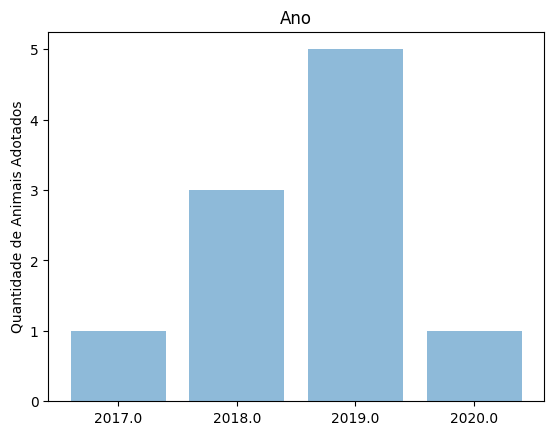

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(re_animais_adotados)
cm = sns.light_palette("green", as_cmap=True)
df.style.background_gradient(cmap=cm)
 
objects = tuple(df.Ano)
y_pos = np.arange(len(objects))
performance = list(df.Animais_Adotados)
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Quantidade de Animais Adotados')
plt.title('Ano')
 
plt.show()

In [0]:
#-----INSERIR-NOME-DA-VARIAVEL-PARA-PRINTAR-----#

re_animais_sexo

,Sexo,Animais_Adotados
0,M,6
1,F,4


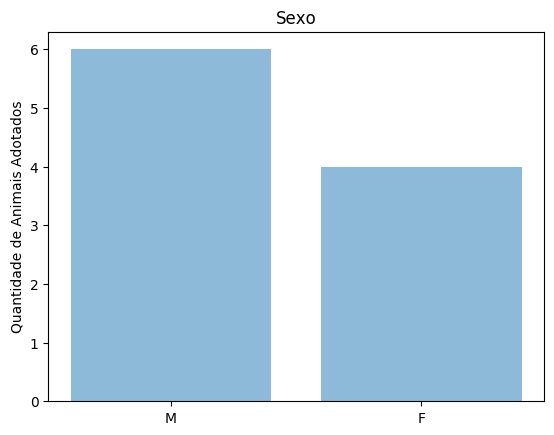

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(re_animais_sexo)
cm = sns.light_palette("green", as_cmap=True)
df.style.background_gradient(cmap=cm)
 
objects = tuple(df.Sexo)
y_pos = np.arange(len(objects))
performance = list(df.Animais_Adotados)
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Quantidade de Animais Adotados')
plt.title('Sexo')
 
plt.show()

In [0]:
#-----INSERIR-NOME-DA-VARIAVEL-PARA-PRINTAR-----#

re_animais_cadastrados

,Ano,Animais_Cadastrados
0,2017.0,4
1,2018.0,9
2,2019.0,7


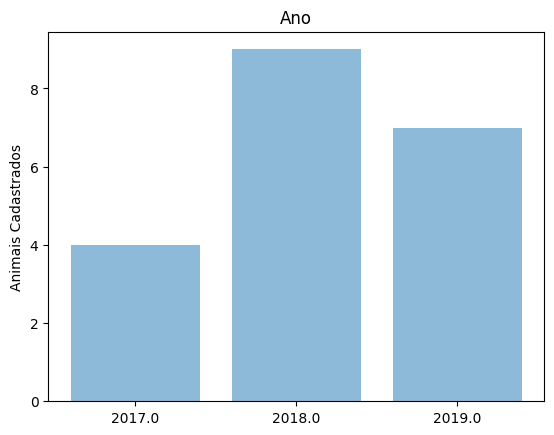

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(re_animais_cadastrados)
cm = sns.light_palette("green", as_cmap=True)
df.style.background_gradient(cmap=cm)
 
objects = tuple(df.Ano)
y_pos = np.arange(len(objects))
performance = list(df.Animais_Cadastrados)
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Animais Cadastrados')
plt.title('Ano')
 
plt.show()

In [0]:
#-----INSERIR-NOME-DA-VARIAVEL-PARA-PRINTAR-----#

re_visitas_adocao

,Animais_Adotados,Visitas_Agendadas
0,10,10


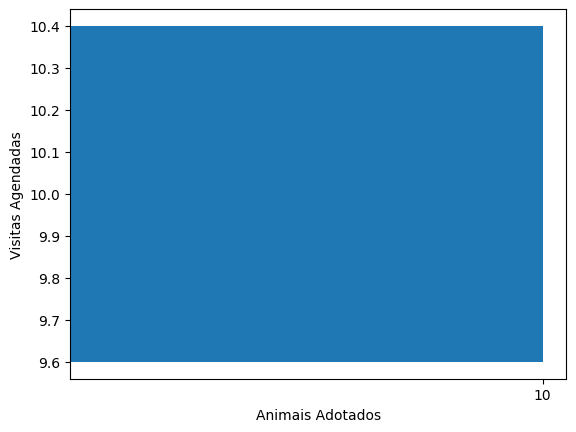

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = tuple(re_visitas_adocao.Animais_Adotados)
y_pos = np.arange(len(objects))
performance = list(re_visitas_adocao.Visitas_Agendadas)
 
plt.barh(performance, objects)
plt.xticks(objects)
plt.xlabel('Animais Adotados')
plt.ylabel('Visitas Agendadas')
 
plt.show()

In [0]:
#-----INSERIR-NOME-DA-VARIAVEL-PARA-PRINTAR-----#

re_faixa_etaria

,Faixa_Etaria,Animais_Adotados
0,Entre 18 e 30 anos,3
1,Maiores de 50 ano,1
2,Entre 31 e 50 anos,6


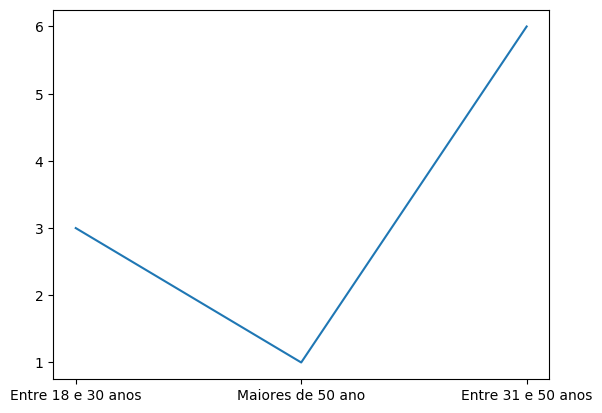

In [0]:
import matplotlib.pyplot as plt
plt.plot(re_faixa_etaria.Faixa_Etaria, re_faixa_etaria.Animais_Adotados)